# (연구&교수님) 다중척도논문 – STFT

최규빈  
2024-07-10

#### 주파수 변조 신호의 수식

1.  시간 $t$ 에 따른 주파수 $f(t)$ 는 다음과 같이 선형적으로 증가합니다:
    $$
    f(t) = f_0 + \frac{f_1 - f_0}{T} t
    $$ 여기서 $f_0$ 는 시작 주파수, $f_1$ 는 종료 주파수, $T$ 는 전체
    신호의 지속 시간입니다.

2.  즉각적인 주파수에 따른 각주파수 $\omega(t)$ 는 다음과 같습니다:
    $$\omega(t) = 2 \pi f(t) = 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t\right)
    $$

3.  각주파수 $\omega(t)$ 를 시간에 대해 적분하면 위상 $\phi(t)$ 를 얻을
    수 있습니다: $$
    \phi(t) = \int \omega(t) \, dt = \int 2 \pi \left( f_0 + \frac{f_1 - f_0}{T} t \right) dt
    $$

4.  위상 $\phi(t)$ 는 다음과 같이 계산됩니다: $$
    \phi(t) = 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right)
    $$

5.  따라서 신호 $x(t)$ 는 다음과 같이 표현됩니다: $$
    x(t) = \sin(\phi(t)) = \sin \left( 2 \pi \left( f_0 t + \frac{f_1 - f_0}{T} \frac{t^2}{2} \right) \right)
    $$

#### 예제 신호에 적용

주어진 예제에서 $f_0 = 50$ Hz, $f_1 = 300$ Hz, $T = 2$ 초이므로, 신호는
다음과 같습니다: $$
x(t) = \sin \left( 2 \pi \left( 50t + \frac{300 - 50}{2} \frac{t^2}{2} \right) \right) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

따라서, 예제에서 사용된 신호의 수식은 다음과 같습니다: $$
x(t) = \sin \left( 2 \pi \left( 50t + 125t^2 \right) \right)
$$

이 수식은 시간 $t$ 에 따라 주파수가 선형적으로 증가하는 신호를 정확하게
나타냅니다.

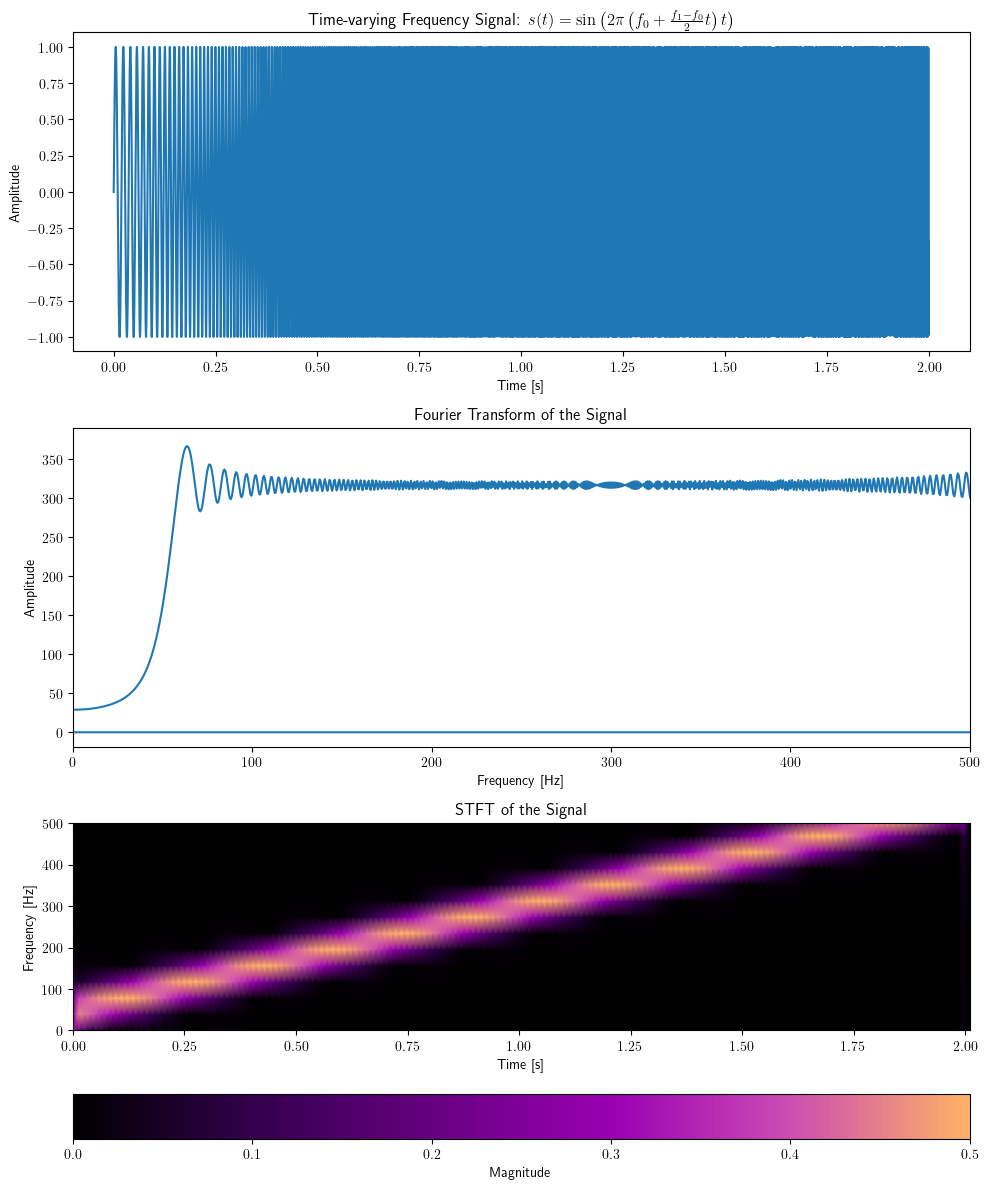

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import stft
from matplotlib.colors import LinearSegmentedColormap

# Define a custom colormap
colors = [
    (0.0, 0.0, 0.0),    # Black
    (0.2, 0.0, 0.3),    # Dark Purple
    (0.4, 0.0, 0.5),    # Purple
    (0.6, 0.0, 0.7),    # Bright Purple
    (0.8, 0.3, 0.7),    # Light Purple
    (1.0, 0.7, 0.4)     # Yellow/Orange
]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# 샘플링 주파수 및 시간 축 설정
fs = 10000
t = np.linspace(0, 2, 2 * fs, endpoint=False)

# 주파수가 선형적으로 증가하는 신호 생성
f0 = 50  # 시작 주파수
f1 = 300  # 종료 주파수
signal = np.sin(2 * np.pi * (f0 + (f1 - f0) * t / 2) * t)

# 푸리에 변환 수행
yf = fft(signal)
xf = fftfreq(len(t), 1 / fs)

# STFT 수행
f, t_stft, Zxx = stft(signal, fs, nperseg=256)

# 그림 생성
fig, axes = plt.subplots(3, 1, figsize=(10, 12), tight_layout=True)

# 원 신호
axes[0].plot(t, signal)
axes[0].set_title(r"Time-varying Frequency Signal: $s(t) = \sin\left(2\pi \left(f_0 + \frac{f_1 - f_0}{2} t\right) t\right)$")
axes[0].set_xlabel("Time [s]")
axes[0].set_ylabel("Amplitude")

# 푸리에 변환 결과
axes[1].plot(xf, np.abs(yf))
axes[1].set_title("Fourier Transform of the Signal")
axes[1].set_xlabel("Frequency [Hz]")
axes[1].set_ylabel("Amplitude")
axes[1].set_xlim(0, 500)

# STFT 결과
im = axes[2].pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud', cmap=cmap)
axes[2].set_title("STFT of the Signal")
axes[2].set_xlabel("Time [s]")
axes[2].set_ylabel("Frequency [Hz]")
axes[2].set_ylim(0, 500)

# Color bar below the STFT plot
cbar = fig.colorbar(im, ax=axes[2], orientation='horizontal', pad=0.2)
cbar.set_label('Magnitude')

This example generates a signal with a linearly increasing frequency and
analyzes it in the time domain, frequency domain, and time-frequency
domain. The generated signal is mathematically described by the
following discrete equation:

$$ x_i = \sin\left(2\pi \left(f_0 + \frac{f_1 - f_0}{2N} i\right) i\right) $$

where \$ f_0 \$ is the initial frequency, \$ f_1 \$ is the final
frequency, and \$ N \$ is the total number of samples. In this study, \$
f_0 = 50 \$ Hz, \$ f_1 = 300 \$ Hz, and \$ N = 20000 \$ are used,
corresponding to a duration of 2 seconds with a sampling rate of 10,000
Hz.

In the time domain, the signal \$ x_i \$ is generated and its
characteristics are observed over time, as shown in Figure 1. The figure
illustrates how the frequency of the signal increases linearly over
time. This can be expressed as:

$$ x_i = \sin\left(2\pi \left(50 + \frac{250}{2N} i\right) i\right) $$

Figure 1 shows the time-varying frequency signal \$ x_i \$.

For the frequency domain analysis, the Fourier Transform is performed on
the signal \$ x_i \$. The discrete Fourier Transform (DFT) is defined as
follows:

$$ X_k = \sum_{i=0}^{N-1} x_i e^{-j2\pi ki/N} $$

The result of the Fourier Transform is shown in Figure 2, which plots
the frequency components of the signal. This figure provides insight
into the main frequency components present in the signal.

Figure 2 illustrates the Fourier Transform of the signal \$ x_i \$.

In the time-frequency domain analysis, the Short-Time Fourier Transform
(STFT) is employed to analyze the signal. The STFT provides a way to
visualize how the frequency content of the signal changes over time. It
is defined as:

$$ \text{STFT}(x_i) = \sum_{m=-\infty}^{\infty} x_m w[i-m] e^{-j2\pi fm} $$

The result of the STFT is depicted in Figure 3. This figure shows the
time-frequency representation of the signal, highlighting the changes in
frequency content over time using color. It clearly visualizes the
time-varying nature of the signal’s frequency components.

Figure 3 displays the STFT of the signal \$ x_i \$.

In conclusion, this example demonstrates the generation of a signal with
a linearly increasing frequency and its analysis in the time domain,
frequency domain, and time-frequency domain. The results from each
domain effectively visualize the characteristics and changes in the
signal, providing a comprehensive understanding of its behavior.